# EOSC 576 Problems

In [2]:
__author__ = 'Yingkai (Kyle) Sha'
__email__  = 'yingkai@eos.ubc.ca'

In [3]:
from IPython.core.display import HTML
HTML(open("../custom.css", "r").read())

In [4]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
% matplotlib inline

#Content
 1. [**Chapter 4 - Organic Matter Production**](#Chapter-4---Organic-Matter-Production)
 1. [**Chapter 10 - Carbon Cycle, CO2, Climate**](#Chapter-10---Carbon-Cycle,-CO2,-Climate)

# Chapter 4 - Organic Matter Production

**4.10** Assume the composition of organic matter is $(CH_2)_{30}(CH_2O)_{76}(NH_3)_{16}(H_3PO_4)$

(a) Calculate the C:N:P stoichiometric ratio of this organic matter

*Ans:*
$$
C:N:P = 106:16:1 
$$

(b) Calculate the amount of $O_2$ that would be required to oxidize this material if $H_3PO_4$, $HNO_3$, $H_2O$, and $CO_2$ are the oxidation products of phosphorus, nitrogen, hydrogen, and carbon, respectively. Give the full equation for the oxidation reaction. ...

*Ans:* Since organic matter has $C:N:P = 106:16:1$, 1mol organic reactant finally becomes 106mol $CO_2$, 16mol $HNO_3$, 1mol $H_3PO_4$. Then we add $H_2O$ to balance hydrogen, we will get: 
    $$
    (CH_2)_{30}(CH_2O)_{76}(NH_3)_{16}(H_3PO_4) + 193O_2 \longrightarrow 106CO_2 + 16HNO_3 + H_3PO_4 + 122H_2O
    $$

(c)  Suppose water upwelling to the surface has a total carbon concentration of $2000\ mmol/m^3$, an oxygen concentration of $160\ mmol/m^3$, a nitrate concentration of $5\ mmol/m^3$, and a phosphate concentration of $1\ mmol/m^3$. 
 
 * Which of these nutrients is likely to limit production if the light supply is adequate and there is NO nitrogen fixation? 
 * Which of the elements will limit production if nitrogen fixation is allowed? 
 * In each case, calculate the concentration of the remaining nutrients after the limiting nutrient is exhausted. 
 
    *Ans:* photosynthesis consume nutrients in the ratio of $C:N:P = 106:16:1$. So if there is no nitrogen fixation, nitrate is the main source of $N$ and it is the limiting nutrient, when nitrate runs out, we still have $1 - 5/16 = 0.6875\ mmol/m^3$ phosphate.
    
    *Ans:* If nitrogen fixation is allowed, then atmospheric bi-nitrogen could also be a source of $N$ and this time phosphate is the limiting nutrient. The concentration of the remaining nutrients depends on the intensity of nitrogen fixation relative to photosynthesis.
    
   
    




**4.11** Nitrate may serve as the terminal electron acceptor (i.e., oxidant) for the remineralization
of organic matter if oxygen is not available. The nitrate loses its oxygen and is converted to
dissolved N2, in the process of which it gains electrons. This is referred to as *denitrification*.

(a) Write a balanced equation for the oxidation of the organic matter in problem 4.10 by
denitrification. Assume that the organic matter reacts with nitrate in the form $HNO_3$, and
that all the nitrogen present in both the organic matter and nitrate is converted to $N_2$. All
other oxidation products are as in problem 4.10 (b)

*Ans:*
$$
(CH_2)_{30}(CH_2O)_{76}(NH_3)_{16}(H_3PO_4) + 107HNO_3 \longrightarrow 106CO_2 + 61.5N_2 + H_3PO_4 + 185H_2O
$$

(b) What fraction of the $N_2$ in (a) comes from nitrate?

*Ans:*
$$
107/(61.5*2) = 0.8699
$$

**4.14** ... In this problem, you are to estimate the diurnally (24 hr) averaged light supply function $\gamma_P(I_0)$ at the surface of the ocean, which we will define as
$\left<\gamma_P(I_0)\right>$. Assume that $I_n = 1000\ W/m^2$, and that the diurnal variation of the irradiance function $f(\tau)$ is given as a triangular function that increases linearly from 0 at 6 AM to 1 at noon, then back to 0 at 6 PM. Do this in two steps:

(a) Starting with (4.2.13), give an equation for the surface irradiance, $I_0$ for the first 6 hours
of daylight in terms of the time $t$ in hours, with $t$ set to 0 at daybreak. Assume that the
fraction of photosynthetically active radiation (PAR) is $f_{PAR} = 0.4$ and that the cloud cover
coefficient $f(C) = 0.8$.

*Ans*: Eq. (4.2.13) is

$$
    I_0 = f_{PAR}\cdot f(C) \cdot f(\tau) \cdot I_n
$$

based on the knowns, we have ($t$ in hours):

\begin{equation}
  I_0 = \left\{
   \begin{array}{c}
   320 \times \left(\frac{1}{6}t-1\right) \qquad 6 < t < 12 \\
   320 \times \left( 3-\frac{1}{6}t\right) \qquad 12 < t < 18 \\
   0 \qquad 0 < t < 6, \qquad 18 < t <24
   \end{array}
  \right.
  \end{equation}

(b) Calculate $\left<\gamma_P(I_0)\right>$. Use the `Platt and Jassby` formulation (4.2.16). To calculate $I_k$ from
(4.2.17), use for $V_P$ the typical $V_{max} = 1.4$ given in the text, and the representative value for $\alpha$ of $0.025$. Solve the problem analytically by stepwise integration over the 24 hours of the day.

*Ans*:
Based on Eq. (4.2.17)
$$
    I_k = \frac{V_P}{\alpha} = 56\ W/m^2
$$

Then based on Eq. (4.2.16)
$$
    \gamma_P(I_0) = \frac{I_0}{\sqrt{I_k^2 + I_0^2}}
$$
So we have:
$$
    \left<\gamma_P(I_0)\right> = \frac1{24}\int_0^{24}{\gamma_P(I_0)dt}
$$
Here we solve it numerically:

In [3]:
t = np.linspace(0, 24, 100)
hit1 = (t>6)&(t<=12)
hit2 = (t>12)&(t<=18)
I0 = np.zeros(np.size(t))
I0[hit1] = 320 * ((1./6) * t[hit1] - 1)
I0[hit2] = 320 * (3 - (1./6) * t[hit2])
Ik = 56
rI0 = I0/np.sqrt(Ik**2 + I0**2)

(0, 1)

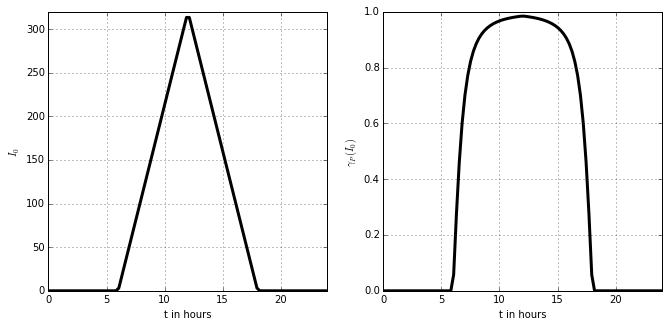

In [4]:
fig=plt.figure(figsize=(11, 5))
ax1=plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2=plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
ax1.plot(t, I0, 'k-', linewidth=3); ax1.grid(); 
ax1.set_xlabel('t in hours', fontweight=12)
ax1.set_ylabel('$I_0$', fontweight=12)
ax1.set_xlim(0, 24); ax1.set_ylim(0, 320)
ax2.plot(t, rI0, 'k-', linewidth=3); ax2.grid(); 
ax2.set_xlabel('t in hours', fontweight=12)
ax2.set_ylabel('$\gamma_P(I_0)$', fontweight=12)
ax2.set_xlim(0, 24); ax2.set_ylim(0, 1)

In [5]:
delta_t = t[1]-t[0]
result = (1./24) * np.sum(rI0*delta_t)
print('Daily average of rI0 is: {}'.format(result))

Daily average of rI0 is: 0.420146160518


So light limits is important.

**4.15** In this problem, you are to find the depth at which the diurnally averaged light supply $\left<\gamma_P\left(I(z)\right)\right>$ crosses the threshold necessary for phytoplankton to achieve the minimum concentration at which zooplankton can survive, $0.60\ mmol/m^3$. Use the temperature dependent growth rate given by the `Eppley relationship` (4.2.8) for a temperature of $10^\circ C$, a mortality rate $\lambda_P$ of $0.05\ d^{-1}$, and a nitrate half-saturation constant $K_N$ of $0.1\ mmol/m^3$. Assume that the total nitrate concentration $N_T$ is $10\ mmol/m^3$. Do this in two steps:

(a) Find the minimum light supply function $\gamma_P(I)$ that is required in order for phytoplankton
to cross the threshold concentration (assume zooplankton concentration $Z = 0$)

*Ans:*
The steady state of phytoplankton in N-P-Z model:
$$
SMS(P) = 0 = V_{max}\gamma_P(N)\gamma_P(I) - \lambda_P
$$

And now we try to solve light limits $\gamma_P(I)$.

The threshold of phytoplankton $P = 0.60\ mmol/m^3$, so we have the concentration of nutrient:
$$
N = N_T - P - Z = 9.4\ mmol/m^3
$$
Then calling Eq. 4.2.11., nutrient limits is:
$$
\gamma_P(N) = \frac{N}{K_N+N} = 0.99
$$
For the maximum growth rate, we have Eq. 4.2.8:
$$
V_{max} = V_P(T) = ab^{cT} = 0.6*1.066^{10} = 0.637
$$
Thus the minimum light supply function is:
$$
\gamma_P(I) = \frac{\lambda_P}{V_{max}\gamma(N)} = 0.079
$$

(b) Assuming that $\gamma_P(I)$ from (a) is equal to the diurnal average $\left<\gamma_P\left(I(z)\right)\right>$, at what depth $H$ in
the ocean will the diurnally averaged light supply function cross the threshold you
estimated in (a)? Assume that P is constant with depth and use a total attenuation
coefficient of $0.12\ m^{-1}$.

*Ans:*

Here I borrowed 2 values from problem **4.14** $\alpha = 0.025$, and $I_0 = 1000$.

Based on Eq. (4.2.16), Eq. (4.2.17):

$$
I = \frac{\gamma_P(I)I_k}{\sqrt{1-\gamma_P(I)^2}}, \qquad\  I_k = \frac{V_P}{\alpha}
$$

For the critical depth, growth equals to death, $V_P = \lambda_P=0.05$, and we get $I = 0.1584$

Then from Beer's Law:

$$
I = I_0\exp(-KH), \qquad\ K=0.12
$$

So we have:

$$
H = -\frac1K\ln\frac{I}{I_0} = 72.92\ m 
$$

This is the deepest place for zooplankton to survive, and phytoplankton has a concentration of $60\ mmol/m^3$. 

#Chapter 10 - Carbon Cycle, CO2, Climate

**10.4** Explain why the surface ocean concentration of anthropogenic CO2 is higher
in low latitudes than it is in high latitudes. Why is it higher in the Atlantic
than in the Pacific ?

*Ans:*

The basic idea is the variation of buffering factor $\gamma_{DIC}$ is more important than the solubility of $\mathrm{CO_2}$

If we integrate eq(10.2.16) begin with *Anthropocene*, $C_{ant}$ is a function of $\gamma_{DIC}$:
$$
    C_{ant}(t) = \int_{t=t_\pi}^{t_0}{\frac{\partial DIC}{\partial t}dt} = \frac1{\gamma_{DIC}}\frac{DIC}{pCO_2^{oc}}\left(\left.pCO_2^{atm}\right|_{t_0}^{t_\pi}\right)
$$

   * Tropics has low $\gamma_{DIC}$ so high accumulated $C_{ant}$ takeup;
   * High-latitude regions has high $\gamma_{DIC}$ so ...
   * Atlantic has a lower $\gamma_{DIC}$ than Pacific due to its high *Alk* (see eq(10.2.11))

**10.5** How long will it take for a pulse of $\mathrm{CO_2}$ emitted into the atmosphere to be reduced to 50%, 20%, 10%, and 1% of its original value? For each answer list? which process is the primary one responsible for the removal of $\mathrm{CO_2}$ from the atmosphere at the point in time the threshold is crossed.

*Ans:*

We have many choices of impulse response functions (IRF), a simple one used by IPCC-SAR is: 
$$
IRF = A_0 + \sum_{i=1}^5{A_i\exp\left(-\frac{t}{\tau_i}\right)}
$$
$A_i$ and $\tau_i$ are empirical values, $t$ for "year" (<a href="http://unfccc.int/resource/brazil/carbon.html">details here</a>)

In [74]:
def IRF_IPCC(A, tau, t):
    IRF = A[0]*np.ones(t.shape)
    for i in range(5):
        IRF = IRF + A[i+1]*np.exp(-1*t/tau[i])
    return IRF

In [122]:
A_std    = np.array([0.1369, 0.1298, 0.1938, 0.2502, 0.2086, 0.0807])
tau_std  = np.array([371.6, 55.7, 17.01, 4.16, 1.33])
t = np.linspace(0, 500, 501)
IRF = IRF_IPCC(A_std, tau_std, t)

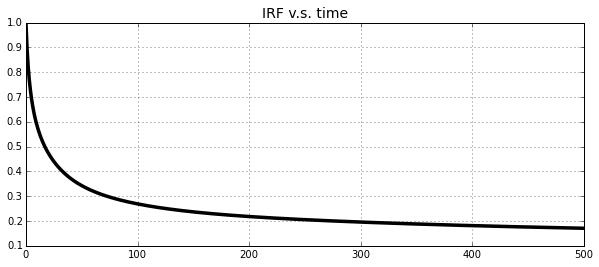

In [123]:
fig = plt.figure(figsize=(10, 4)); ax = fig.gca();ax.grid()
plt.plot(t, IRF, 'k-', linewidth=3.5)
ax.set_title('IRF v.s. time', fontsize=14)

In [114]:
hit = np.flipud(t)[np.searchsorted(np.flipud(IRF), [0.5, 0.2])]
print('Time to reduced to 50% is {} year, to 20% is {} year'.format(hit[0], hit[1]))

Time to reduced to 50% is 16.0 year, to 20% is 276.0 year


For 50%, DIC buffering is dominate. For 20%, it costs 276 yr and DIC buffering is nearly saturate (see Fig.10.2.3), and $\mathrm{CaCO_3}$ buffering begin to dominate.

**10.8** Explain the apparent paradox that the tropical Pacific is viewed as being a
large sink for anthropogenic $\mathrm{CO_2}$, despite the fact that it is a region of net
outgassing of $\mathrm{CO_2}$.

*Ans:*

According to **10.4** we know that tropical ocean takes up more $Ant_{C}$ because it has a lower $\gamma_{DIC}$. The outgassing in tropical Pacific is due to the upwelling and inefficient biological pump, these are the business of natural carbon (and since natural carbon cycle is in equilibrium, this outgassing is balanced by some other downwelling regions). 

**10.13**